In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Functions

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Loading an EM Trace and Plotting

In [3]:
data = getData("/home/asanka/Desktop/smartphone-EM-dataset-2020-11-23/apple-iphone-4s/camera-photo.cfile")

In [4]:
len(data)

69249536

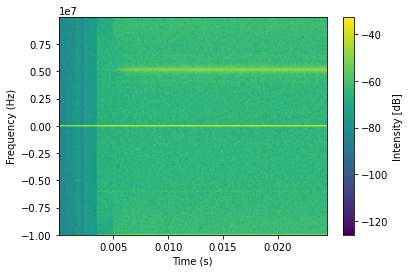

In [5]:
fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data[10000:500000], NFFT=512, Fs=20e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

### Short-time Fourier Transform (STFT) of EM Trace

In [13]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=1024, noverlap=0)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
67628
(1024, 67628)


In [14]:
f, t, Zxx = signal.stft(data, fs=20e6, nperseg=1024, noverlap=512)
print(len(f))
print(len(t))
print(Zxx.shape)

1024
135254
(1024, 135254)
